# Flipkart Customer Support Sentiment Analysis

This project analyzes customer support remarks from Flipkart to classify customer sentiment using Natural Language Processing and Machine Learning.

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv("Customer_support_data.csv")
df.shape, df.columns


((85907, 20),
 Index(['Unique id', 'channel_name', 'category', 'Sub-category',
        'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
        'issue_responded', 'Survey_response_Date', 'Customer_City',
        'Product_category', 'Item_price', 'connected_handling_time',
        'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
        'CSAT Score'],
       dtype='object'))

In [4]:
import sys
!{sys.executable} -m pip install textblob


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)


## 1. Preprocessing Customer Remarks

In [6]:

# Keep only rows with non-null remarks
df = df[df["Customer Remarks"].notna()].copy()

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df["cleaned_remarks"] = df["Customer Remarks"].apply(clean_text)
df["cleaned_remarks"].head()


7                                             very good
8     shopzilla app and its all coustomer care servi...
11                                             very bad
17                                            something
19                                             all good
Name: cleaned_remarks, dtype: object

## 2. Sentiment Analysis with TextBlob

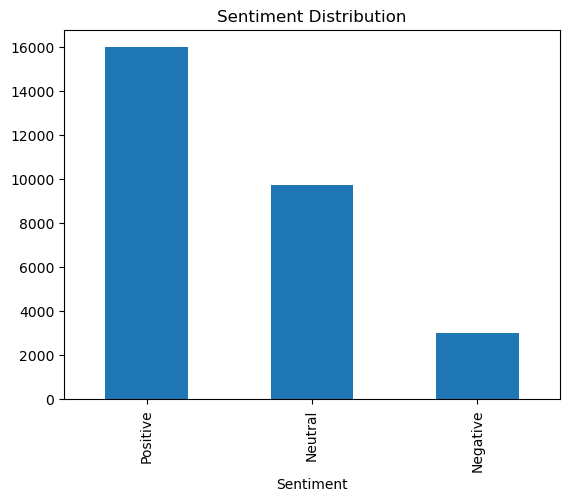

In [7]:

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["cleaned_remarks"].apply(get_sentiment)
df["Sentiment"].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


## 3. Vectorization and Train-Test Split

In [8]:

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df["cleaned_remarks"])
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. ML Model: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.75      0.82       591
     Neutral       0.87      0.96      0.91      1923
    Positive       0.98      0.95      0.97      3235

    accuracy                           0.93      5749
   macro avg       0.92      0.89      0.90      5749
weighted avg       0.94      0.93      0.93      5749



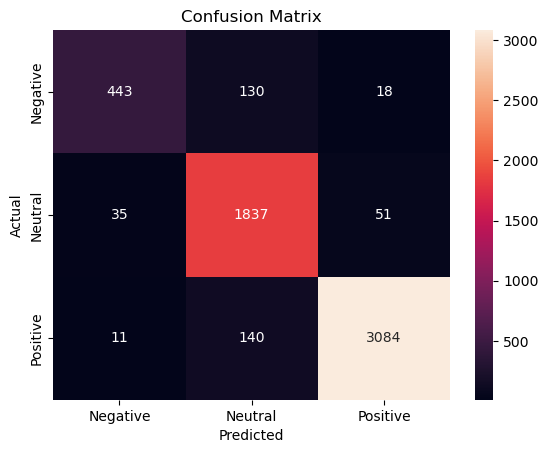

In [9]:

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 5. Conclusion

- Most customer sentiments were Neutral, with a small portion classified as Positive or Negative.
- Logistic Regression performed decently in classifying these categories.
- Further improvements could involve using deep learning (e.g., BERT) or a richer labeled dataset.